In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import files


In [3]:
uploaded = files.upload()


Saving full-bank - bank-additional-full.csv to full-bank - bank-additional-full (2).csv


In [0]:
df=pd.read_csv("full-bank - bank-additional-full.csv")

In [0]:
df.rename(columns={'duration':'contact time'},inplace=True)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [0]:
X=df.drop("y",1)
y=df['y'].copy

In [0]:
##SEPARATING INTO NUMERICAL AND CATEGORICAL COLUMNS
numerical_cols=list(df._get_numeric_data().columns)
categorical_cols=list(set(df.columns)-set(df._get_numeric_data().columns))

In [10]:
numerical_cols

['age',
 'contact time',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [11]:
categorical_cols

['education',
 'contact',
 'housing',
 'marital',
 'month',
 'day_of_week',
 'default',
 'loan',
 'job',
 'y',
 'poutcome']

In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
contact time      0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

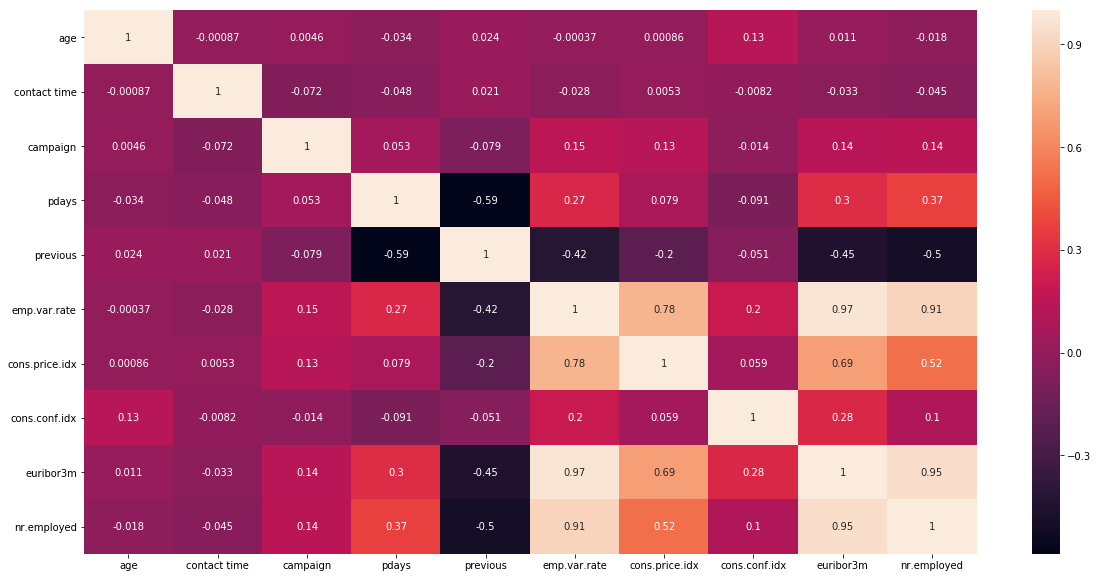

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [15]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


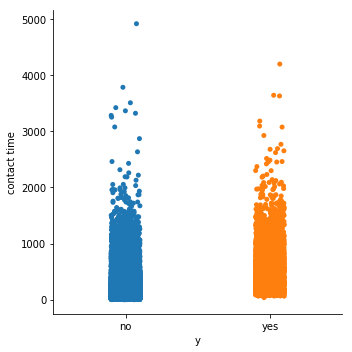

In [16]:
sns.catplot(x="y", y="contact time", data=df)

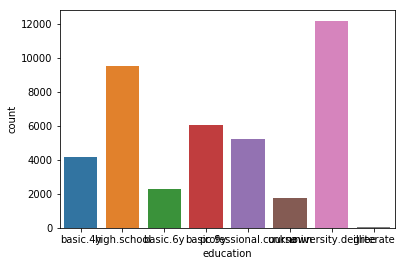

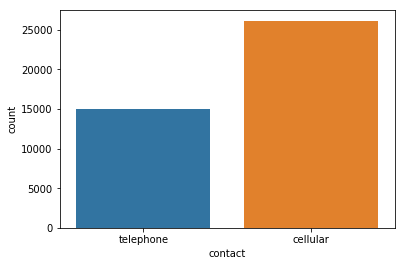

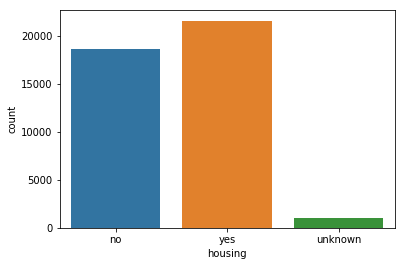

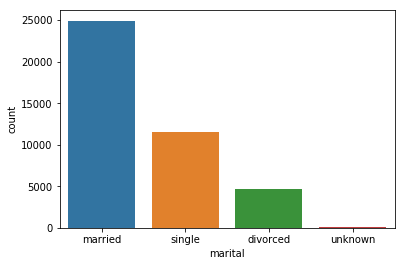

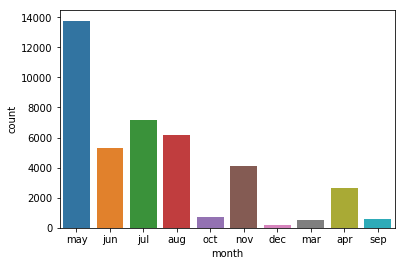

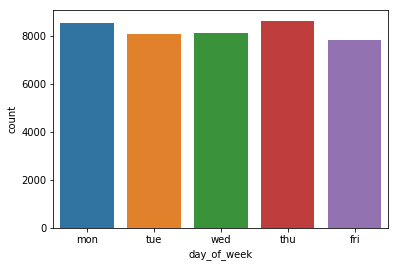

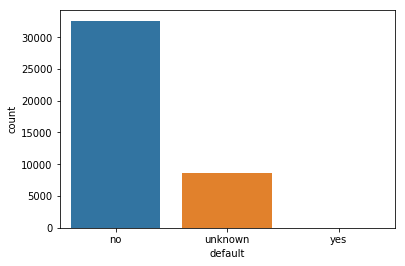

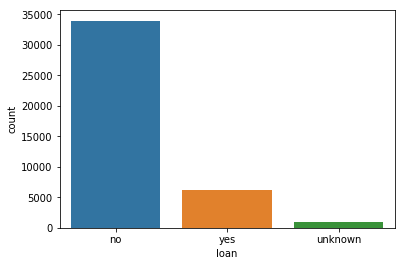

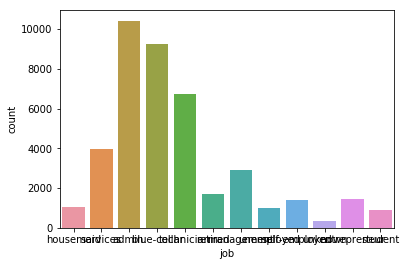

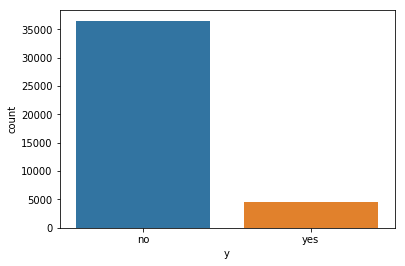

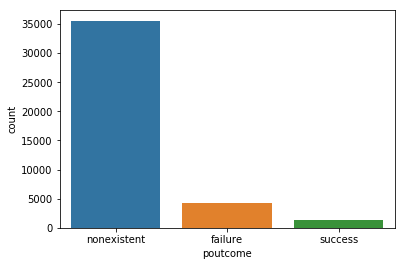

In [17]:
for cols in categorical_cols:
  sns.countplot(df[cols])
  plt.show()

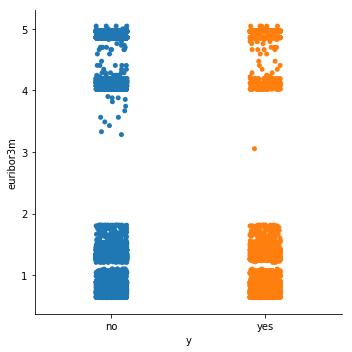

In [18]:
sns.catplot(x="y", y="euribor3m", data=df)

In [0]:
t_corr=df.corr()
corr_columns=t_corr[abs(t_corr)>0.5].index

In [20]:
corr_columns

Index(['age', 'contact time', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [21]:
t_corr

,age,contact time,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
contact time,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [0]:
df['emp&euribor']=np.multiply(df['emp.var.rate'],df['euribor3m'])

In [23]:
df['emp&euribor']

0        5.3427
1        5.3427
2        5.3427
3        5.3427
4        5.3427
5        5.3427
6        5.3427
7        5.3427
8        5.3427
9        5.3427
10       5.3427
11       5.3427
12       5.3427
13       5.3427
14       5.3427
15       5.3427
16       5.3427
17       5.3427
18       5.3427
19       5.3427
20       5.3427
21       5.3427
22       5.3427
23       5.3427
24       5.3427
25       5.3427
26       5.3427
27       5.3427
28       5.3427
29       5.3427
          ...  
41158   -1.1385
41159   -1.1385
41160   -1.1385
41161   -1.1385
41162   -1.1385
41163   -1.1385
41164   -1.1385
41165   -1.1330
41166   -1.1330
41167   -1.1330
41168   -1.1330
41169   -1.1330
41170   -1.1330
41171   -1.1341
41172   -1.1341
41173   -1.1341
41174   -1.1341
41175   -1.1341
41176   -1.1341
41177   -1.1341
41178   -1.1341
41179   -1.1308
41180   -1.1308
41181   -1.1308
41182   -1.1308
41183   -1.1308
41184   -1.1308
41185   -1.1308
41186   -1.1308
41187   -1.1308
Name: emp&euribor, Lengt

In [24]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,emp&euribor
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.3427
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.3427
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.3427
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.3427
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.3427


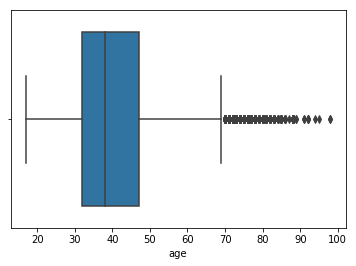

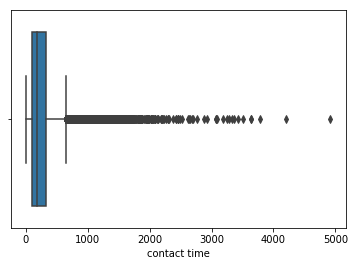

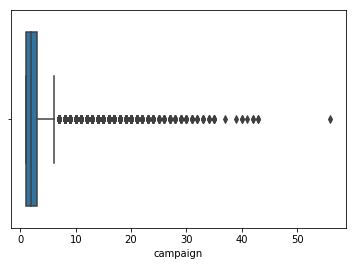

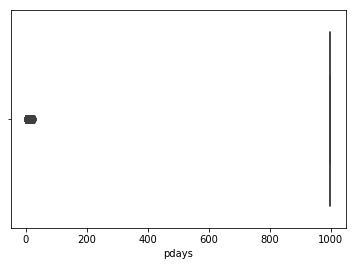

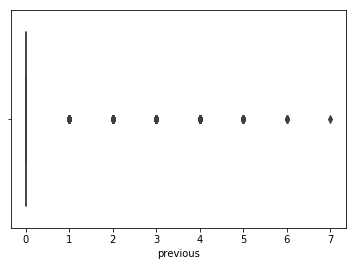

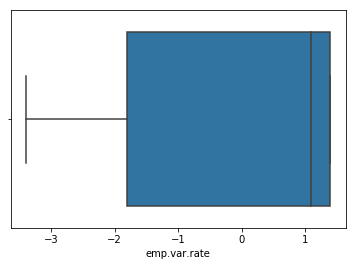

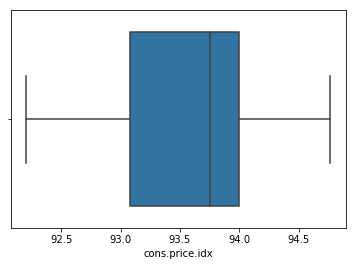

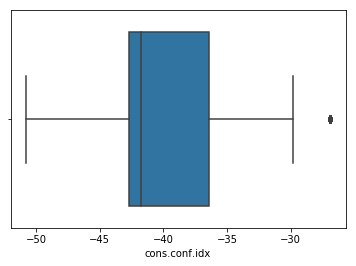

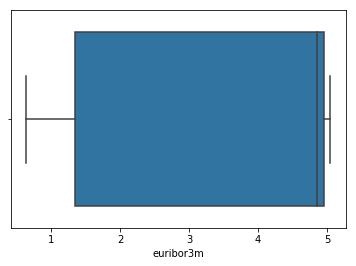

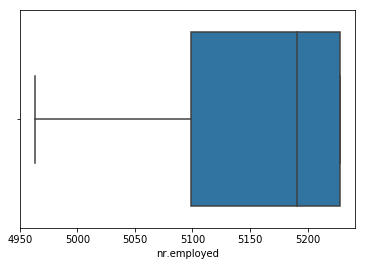

In [25]:
for cols in numerical_cols:
  sns.boxplot(df[cols])
  plt.show()

In [0]:
df.drop(['emp&euribor'],1,inplace=True)

In [0]:
df_x=df.drop(["y"],1)
y=df["y"]

In [28]:
df_x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,contact time,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [0]:
from sklearn.feature_selection import SelectKBest, f_classif , chi2
def selectkbest(df,num_col,cat_col,y):
    df1=df[num_col]
    skb1= SelectKBest(score_func=f_classif, k=5)
    predictors1=skb1.fit_transform(df1,y)
    scores1 = list(skb1.scores_)
    top_k_index1 = skb1.get_support(True)
    top_k_predictors1 =df1.columns[top_k_index1]
    df2=df[cat_col]
    skb2=SelectKBest(score_func=chi2,k=5)
    predictors2=skb2.fit_transform(df2,y)
    scores2 = list(skb2.scores_)
    top_k_index2 = skb2.get_support(True)
    top_k_predictors2 =df2.columns[top_k_index2]
    return(top_k_predictors1,top_k_predictors2)
    
    
    
    
    
   
    

In [0]:
num_col=list(df_x._get_numeric_data().columns)
cat_col=list(set(df_x.columns)-set(df_x._get_numeric_data().columns))

In [44]:
num_col

['age',
 'contact time',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [45]:
cat_col

['education',
 'contact',
 'housing',
 'marital',
 'month',
 'loan',
 'default',
 'day_of_week',
 'job',
 'poutcome']

In [0]:
a=df_x[num_col]

In [47]:
a.head()

,age,contact time,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [0]:
#CONVERTING CATEGORICAL TO NUMERICAL
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for cols in cat_col:
    df_x[cols]=encoder.fit_transform(df_x[cols])

In [60]:
df_x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,contact time,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [62]:
selectkbest(df_x,num_col,cat_col,y)[0]

Index(['contact time', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed'], dtype='object')

In [63]:
selectkbest(df_x,num_col,cat_col,y)[1]

Index(['education', 'contact', 'default', 'job', 'poutcome'], dtype='object')

In [0]:
A=df[selectkbest(df_x,num_col,cat_col,y)[0]]

In [65]:
A

,contact time,pdays,emp.var.rate,euribor3m,nr.employed
0,261,999,1.1,4.857,5191.0
1,149,999,1.1,4.857,5191.0
2,226,999,1.1,4.857,5191.0
3,151,999,1.1,4.857,5191.0
4,307,999,1.1,4.857,5191.0
5,198,999,1.1,4.857,5191.0
6,139,999,1.1,4.857,5191.0
7,217,999,1.1,4.857,5191.0
8,380,999,1.1,4.857,5191.0
9,50,999,1.1,4.857,5191.0


In [0]:
B=df[selectkbest(df_x,num_col,cat_col,y)[1]]

In [69]:
B

,education,contact,default,job,poutcome
0,basic.4y,telephone,no,housemaid,nonexistent
1,high.school,telephone,unknown,services,nonexistent
2,high.school,telephone,no,services,nonexistent
3,basic.6y,telephone,no,admin.,nonexistent
4,high.school,telephone,no,services,nonexistent
5,basic.9y,telephone,unknown,services,nonexistent
6,professional.course,telephone,no,admin.,nonexistent
7,unknown,telephone,unknown,blue-collar,nonexistent
8,professional.course,telephone,no,technician,nonexistent
9,high.school,telephone,no,services,nonexistent


In [0]:
C=A.join(B)

In [71]:
C

,contact time,pdays,emp.var.rate,euribor3m,nr.employed,education,contact,default,job,poutcome
0,261,999,1.1,4.857,5191.0,basic.4y,telephone,no,housemaid,nonexistent
1,149,999,1.1,4.857,5191.0,high.school,telephone,unknown,services,nonexistent
2,226,999,1.1,4.857,5191.0,high.school,telephone,no,services,nonexistent
3,151,999,1.1,4.857,5191.0,basic.6y,telephone,no,admin.,nonexistent
4,307,999,1.1,4.857,5191.0,high.school,telephone,no,services,nonexistent
5,198,999,1.1,4.857,5191.0,basic.9y,telephone,unknown,services,nonexistent
6,139,999,1.1,4.857,5191.0,professional.course,telephone,no,admin.,nonexistent
7,217,999,1.1,4.857,5191.0,unknown,telephone,unknown,blue-collar,nonexistent
8,380,999,1.1,4.857,5191.0,professional.course,telephone,no,technician,nonexistent
9,50,999,1.1,4.857,5191.0,high.school,telephone,no,services,nonexistent


In [0]:
def final_df(skb):
  x=df[skb[0]]
  y=df[skb[1]]
  return(x.join(y))
  

In [0]:
alpha=final_df(selectkbest(df_x,num_col,cat_col,y))

In [78]:
alpha.shape

(41188, 10)

In [0]:
from sklearn.feature_selection import SelectKBest, f_classif , chi2
def df_selectkbest(df,num_col,cat_col,y):
    df1=df[num_col]
    skb1= SelectKBest(score_func=f_classif, k=5)
    predictors1=skb1.fit_transform(df1,y)
    scores1 = list(skb1.scores_)
    top_k_index1 = skb1.get_support(True)
    top_k_predictors1 =df1.columns[top_k_index1]
    df2=df[cat_col]
    skb2=SelectKBest(score_func=chi2,k=5)
    predictors2=skb2.fit_transform(df2,y)
    scores2 = list(skb2.scores_)
    top_k_index2 = skb2.get_support(True)
    top_k_predictors2 =df2.columns[top_k_index2]
    x=df[top_k_predictors1]
    y=df[top_k_predictors2]
    return(x.join(y))

In [0]:
beta=df_selectkbest(df_x,num_col,cat_col,y)

In [80]:
beta.shape

(41188, 10)

In [0]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [0]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

resampling_model = [RandomUnderSampler, ClusterCentroids, TomekLinks, RandomOverSampler, SMOTE]

def resampling_method(model, X_train, y_train):
  model_obj = model(random_state = 0)
  X_sample, y_sample = model_obj.fit_sample(X_train, y_train)
  return X_sample, y_sample

In [81]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [0]:
df['age_range'] = pd.cut(x=df['age'], bins=10)

In [84]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(49.4, 57.5]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(49.4, 57.5]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(33.2, 41.3]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(33.2, 41.3]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(49.4, 57.5]"


In [85]:
df['age_range'].value_counts()

(33.2, 41.3]      12037
(25.1, 33.2]      11343
(41.3, 49.4]       8087
(49.4, 57.5]       5823
(16.919, 25.1]     1666
(57.5, 65.6]       1613
(65.6, 73.7]        318
(73.7, 81.8]        202
(81.8, 89.9]         89
(89.9, 98.0]         10
Name: age_range, dtype: int64

In [0]:
df["age_range"]=encoder.fit_transform(df['age_range'])

In [87]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4


In [88]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [0]:
salaried= ['blue-collar', 'services', 'admin.', 'entrepreneur',
                 'self-employed', 'technician', 'management']
non_salaried=['student', 'retired', 'housemaid.', 'unemployed']

In [0]:
for cols in salaried:
  df['job'].replace(cols,1,inplace=True)
for cols in non_salaried:
  df['job'].replace(cols,0,inplace=True)

In [101]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
1,57,1,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
2,37,1,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
3,40,1,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
4,56,1,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4


In [107]:
crosstab1 = pd.crosstab(index=df["education"], columns=df["y"])
crosstab1

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


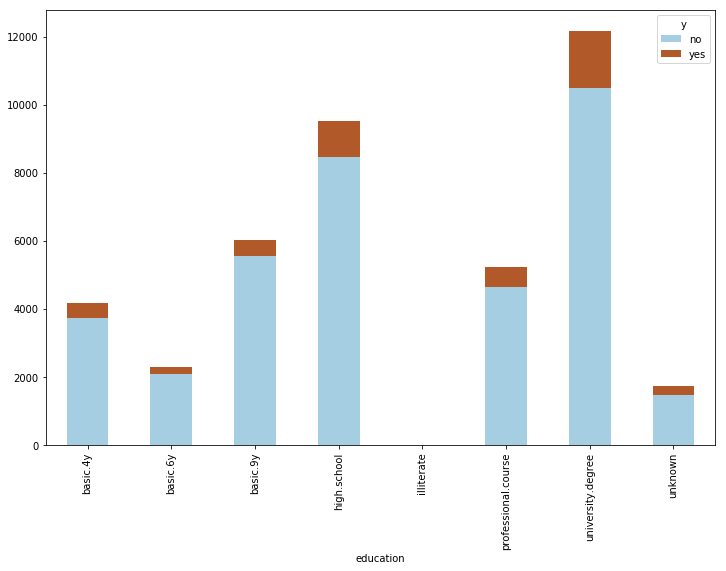

In [108]:
crosstab1.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [109]:
crosstab2 = pd.crosstab(index=df["default"], columns=df["y"])
crosstab2

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [110]:
np.unique(y)

array(['no', 'yes'], dtype=object)

In [0]:
def graph(X,y,label='Classes'):
  colors=['r','b']
  markers=['o','s']
  for l,c,m in zip(np.unique(y),colors,markers):
    plt.scatter(X[y==l, 0],X[y==l, 1],c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [115]:
graph(df['age'],df['y'],'original data set')

ValueError: ignored

In [0]:
df['cons.conf.idx']=abs(df['cons.conf.idx']).astype(int)


In [123]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,36,4.857,5191.0,no,4
1,57,1,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,36,4.857,5191.0,no,4
2,37,1,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,36,4.857,5191.0,no,2
3,40,1,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,36,4.857,5191.0,no,2
4,56,1,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,36,4.857,5191.0,no,4


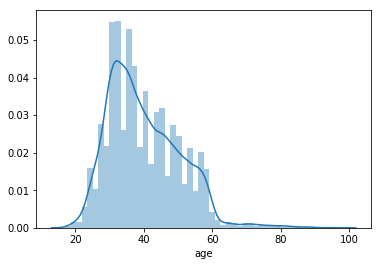

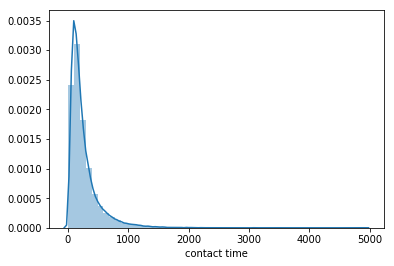

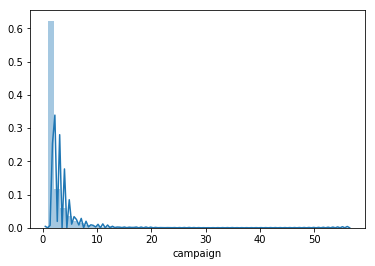

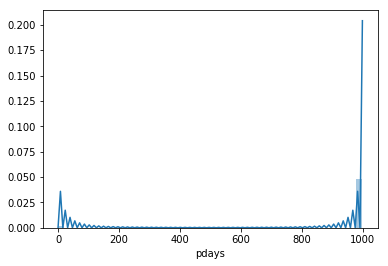

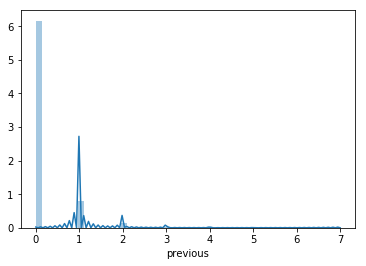

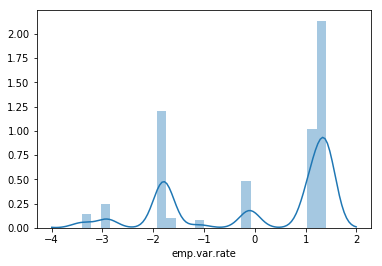

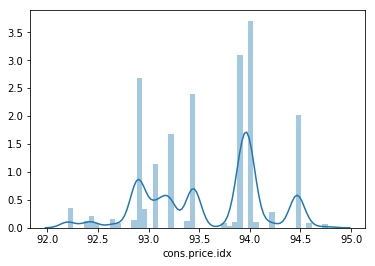

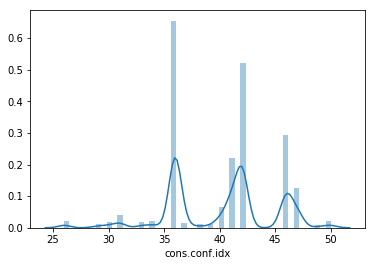

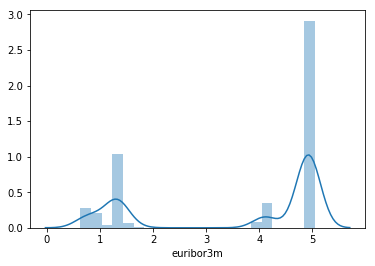

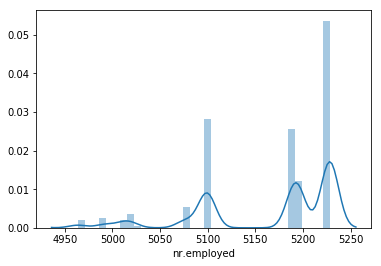

In [124]:
for cols in num_col:
  sns.distplot(df[cols])
  plt.show()

In [0]:
df['contact_log']=(df['contact time'])

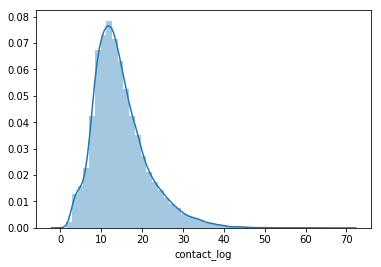

In [128]:
sns.distplot(df['contact_log'])

In [129]:
df[num_col]

,age,contact time,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,36,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,36,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,36,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,36,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,36,4.857,5191.0
5,45,198,1,999,0,1.1,93.994,36,4.857,5191.0
6,59,139,1,999,0,1.1,93.994,36,4.857,5191.0
7,41,217,1,999,0,1.1,93.994,36,4.857,5191.0
8,24,380,1,999,0,1.1,93.994,36,4.857,5191.0
9,25,50,1,999,0,1.1,93.994,36,4.857,5191.0


In [130]:
df['contact time'].value_counts()

85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135     156
92      156
114     156
139     155
96      155
119     155
82      154
89      153
76      153
71      152
126     152
125     152
93      151
107     150
88      150
83      149
123     149
       ... 
2184      1
1395      1
1555      1
1556      1
1447      1
1492      1
3509      1
1460      1
1364      1
1300      1
3078      1
1095      1
1191      1
1255      1
1287      1
3366      1
1479      1
2035      1
1575      1
1767      1
1236      1
3253      1
2089      1
1204      1
1140      1
1108      1
980       1
4918      1
2453      1
2015      1
Name: contact time, Length: 1544, dtype: int64